# 원본데이터 그대로 모델링(NaN 삭제 X)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:/ds_work/source_code/Project_DS/data/train.csv')

In [3]:
df.groupby('Destination').count()
df.groupby('HomePlanet').count()
print('Cabin의 개수',len(df.groupby('Cabin').count()))

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
Destination,,,,,,,,,,,,,
55 Cancri e,1800,1769,1756,1750,1766,1757,1771,1763,1752,1761,1760,1757,1800
PSO J318.5-22,796,780,777,778,782,774,775,780,778,780,784,779,796
TRAPPIST-1e,5915,5765,5765,5788,5787,5781,5787,5791,5778,5790,5781,5779,5915


,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
HomePlanet,,,,,,,,,,,,,
Earth,4602,4488,4507,4503,4514,4487,4499,4505,4490,4503,4491,4496,4602
Europa,2131,2073,2070,2094,2085,2089,2095,2085,2078,2086,2094,2085,2131
Mars,1759,1716,1722,1717,1716,1716,1723,1721,1723,1723,1720,1718,1759


Cabin의 개수 6560


In [20]:
# 범주형 데이터 변환
df = pd.read_csv('C:/ds_work/source_code/Project_DS/data/train.csv')

def df_replace(dataframe):
    
    global df_train,df
    df_temp = df
    df = dataframe
    df = df.replace({'55 Cancri e':0,'PSO J318.5-22':1,'TRAPPIST-1e':2})
    df = df.replace({'Earth':0,'Europa':1,'Mars':2})
    df = df.replace({False:0,True:1})

    # Cabin : 번호  
    df['Cabin'] = df['Cabin'].str[0]
    df.insert(4, 'Cabin_num', df_temp['Cabin'].str[2:-2])
    df.insert(5, 'Cabin_port', df_temp['Cabin'].str[-1])
    df = df.replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})
    df = df.replace({'P':0,'S':1})


    ## 범주형 데이터 확인할 수 있게 dict로 만들어 놓은 것
    Cabin = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}
    Cabin_port = {'P':0, 'S':1} #P : 배의 좌현(port side) S: 배의 우현(starboard side) 
    Destination = {'55 Cancri e': 0, 'PSO J318.5-22': 1,'TRAPPIST-1e':2}
    HomePlanet = {'Earth':0,'Europa':1,'Mars':2}
    CryoSleep = {'False':0,'True':1}
    VIP = {'False':0,'True':1}
    Transported = {'False':0,'True':1}


    df = df.astype({'HomePlanet':'float','CryoSleep':'float','Cabin':'float','Cabin_num':'float','Destination':'float'
    ,'Age':'float','VIP':'float','RoomService':'float','FoodCourt':'float','Cabin_port':'float'
    ,'ShoppingMall':'float','Spa':'float','VRDeck':'float','Transported':'float'})
    
df_replace(df)
df_train = df

In [21]:
df = df.drop(['PassengerId','Name'],axis=1)

In [22]:
target = df.loc[:, 'Transported']
target

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
8688    0.0
8689    0.0
8690    1.0
8691    0.0
8692    1.0
Name: Transported, Length: 8693, dtype: float64

In [23]:
df.iloc[:,:-1]

,HomePlanet,CryoSleep,Cabin,Cabin_num,Cabin_port,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,0.0,1.0,0.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,5.0,0.0,1.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0
2,1.0,0.0,0.0,0.0,1.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0
3,1.0,0.0,0.0,0.0,1.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0
4,0.0,0.0,5.0,1.0,1.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,0.0,98.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0
8689,0.0,1.0,6.0,1499.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,6.0,1500.0,1.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0
8691,1.0,0.0,4.0,608.0,1.0,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0


In [24]:
df.iloc[:,-1]

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
8688    0.0
8689    0.0
8690    1.0
8691    0.0
8692    1.0
Name: Transported, Length: 8693, dtype: float64

In [25]:
#데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.2, random_state=42)

## XGboost

[0]	validation_0-logloss:0.58861
[1]	validation_0-logloss:0.53275
[2]	validation_0-logloss:0.49770
[3]	validation_0-logloss:0.47197
[4]	validation_0-logloss:0.45451
[5]	validation_0-logloss:0.44411
[6]	validation_0-logloss:0.43176
[7]	validation_0-logloss:0.42819
[8]	validation_0-logloss:0.42272
[9]	validation_0-logloss:0.41983
[10]	validation_0-logloss:0.41641
[11]	validation_0-logloss:0.41599
[12]	validation_0-logloss:0.41420
[13]	validation_0-logloss:0.41011
[14]	validation_0-logloss:0.40980
[15]	validation_0-logloss:0.40926
[16]	validation_0-logloss:0.40869
[17]	validation_0-logloss:0.40703
[18]	validation_0-logloss:0.40461
[19]	validation_0-logloss:0.40491
[20]	validation_0-logloss:0.40510
[21]	validation_0-logloss:0.40551
[22]	validation_0-logloss:0.40684
[23]	validation_0-logloss:0.40680
[24]	validation_0-logloss:0.40863
[25]	validation_0-logloss:0.40802
[26]	validation_0-logloss:0.40710
[27]	validation_0-logloss:0.40695


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.7901092581943646

confusion_matrix : 
 [[678 183]
 [182 696]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

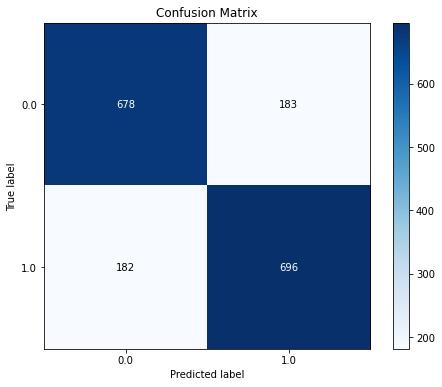

In [30]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

18
0.4046081318894895


0.4046081333049499

array([0.06782953, 0.7065104 , 0.024158  , 0.01562964, 0.02233012,
       0.01091842, 0.01138891, 0.00875717, 0.03212795, 0.02237078,
       0.01583974, 0.03032388, 0.0318154 ], dtype=float32)

<BarContainer object of 13 artists>

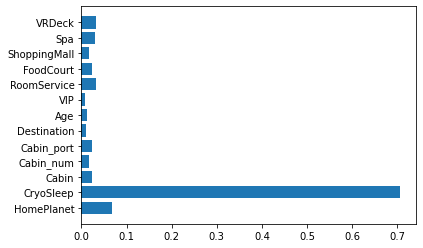

In [31]:
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

# feature_importances_
import matplotlib.pyplot as plt 
model.feature_importances_
plt.barh(df.iloc[:,:-1].columns, model.feature_importances_)

## LGBMClassifier

[1]	valid_0's binary_logloss: 0.654422
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.622
[3]	valid_0's binary_logloss: 0.595886
[4]	valid_0's binary_logloss: 0.5742
[5]	valid_0's binary_logloss: 0.556117
[6]	valid_0's binary_logloss: 0.539815
[7]	valid_0's binary_logloss: 0.526158
[8]	valid_0's binary_logloss: 0.51408
[9]	valid_0's binary_logloss: 0.503575
[10]	valid_0's binary_logloss: 0.494004
[11]	valid_0's binary_logloss: 0.486519
[12]	valid_0's binary_logloss: 0.478199
[13]	valid_0's binary_logloss: 0.471636
[14]	valid_0's binary_logloss: 0.466067
[15]	valid_0's binary_logloss: 0.460849
[16]	valid_0's binary_logloss: 0.456198
[17]	valid_0's binary_logloss: 0.452993
[18]	valid_0's binary_logloss: 0.451086
[19]	valid_0's binary_logloss: 0.446959
[20]	valid_0's binary_logloss: 0.444228
[21]	valid_0's binary_logloss: 0.442172
[22]	valid_0's binary_logloss: 0.439095
[23]	valid_0's binary_logloss: 0.437704
[24]	valid_0's binary_logloss: 0.4

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.7964347326049454

confusion_matrix : 
 [[667 194]
 [160 718]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

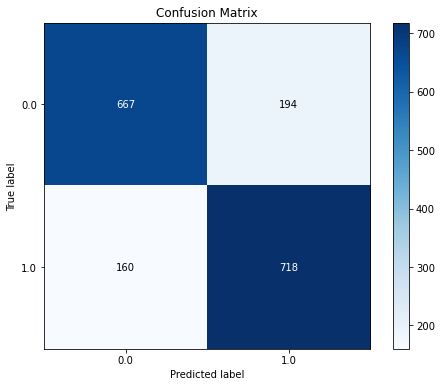

In [32]:
import lightgbm as lgb # 분류 회귀 다 됨
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(X_test, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

In [33]:
print(model.best_iteration_)
print(model.best_score_)

67
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.4064655206158589)])})


In [34]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.40646552061585906

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

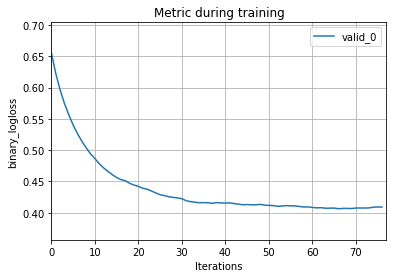

In [35]:
lgb.plot_metric(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

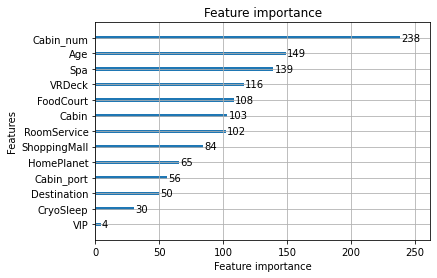

In [36]:
lgb.plot_importance(model)